In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [118]:
# Load and preprocess data
books_path = "BX-Books.csv"
ratings_path = "BX-Book-Ratings.csv"

df_books = pd.read_csv(
    books_path,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['isbn', 'title', 'author'],
    usecols=['isbn', 'title', 'author'],
    dtype={'isbn': 'str', 'title': 'str', 'author': 'str'})

df_ratings = pd.read_csv(
    ratings_path,
    encoding = "ISO-8859-1",
    sep=";",
    header=0,
    names=['user', 'isbn', 'rating'],
    usecols=['user', 'isbn', 'rating'],
    dtype={'user': 'int32', 'isbn': 'str', 'rating': 'float32'})

In [119]:
df_list = [df_books,df_ratings]
def dataset_shapes(df_list):
    for df in df_list:
        print(f"have:{df.shape[0]} rows and {df.shape[1]} columns")
dataset_shapes(df_list)

have:271379 rows and 3 columns
have:1149780 rows and 3 columns


### Books dataset exploration


In [120]:
df_books.head()

,isbn,title,author
0,0195153448,Classical Mythology,Mark P. O. Morford
1,0002005018,Clara Callan,Richard Bruce Wright
2,0060973129,Decision in Normandy,Carlo D'Este
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata
4,0393045218,The Mummies of Urumchi,E. J. W. Barber


In [121]:
df_books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271379 entries, 0 to 271378
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   isbn    271379 non-null  object
 1   title   271379 non-null  object
 2   author  271378 non-null  object
dtypes: object(3)
memory usage: 6.2+ MB


In [122]:
# get top 20 authors

df_books.author.value_counts().nlargest(20)



Agatha Christie          632
William Shakespeare      567
Stephen King             524
Ann M. Martin            423
Carolyn Keene            373
Francine Pascal          372
Isaac Asimov             330
Nora Roberts             315
Barbara Cartland         307
Charles Dickens          302
Not Applicable (Na )     286
R. L. Stine              282
Mark Twain               231
Jane Austen              223
Terry Pratchett          220
Mary Higgins Clark       218
Piers Anthony            217
Marion Zimmer Bradley    216
Janet Dailey             214
Franklin W. Dixon        204
Name: author, dtype: int64

In [123]:
df_books.shape

(271379, 3)

In [124]:
# search for duplicates in titles
non_dup_df = df_books.drop_duplicates(["title","isbn"], keep="first")
non_dup_df.shape

(271379, 3)

### Rating Dataset exploration

In [125]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   user    1149780 non-null  int32  
 1   isbn    1149780 non-null  object 
 2   rating  1149780 non-null  float32
dtypes: float32(1), int32(1), object(1)
memory usage: 17.5+ MB


In [126]:
df_ratings.head(10)

,user,isbn,rating
0,276725,034545104X,0.0
1,276726,0155061224,5.0
2,276727,0446520802,0.0
3,276729,052165615X,3.0
4,276729,0521795028,6.0
5,276733,2080674722,0.0
6,276736,3257224281,8.0
7,276737,0600570967,6.0
8,276744,038550120X,7.0
9,276745,342310538,10.0


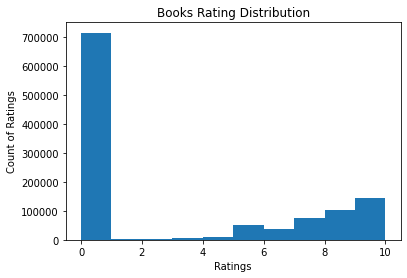

In [127]:
#plot distribution of ratings
plt.hist(df_ratings["rating"])
plt.xlabel("Ratings")
plt.ylabel("Count of Ratings")
plt.title("Books Rating Distribution")
plt.show()

In [128]:
ratings_dist = df_ratings["rating"].value_counts()
ratings_dist

0.0     716109
8.0     103736
10.0     78610
7.0      76457
9.0      67541
5.0      50974
6.0      36924
4.0       8904
3.0       5996
2.0       2759
1.0       1770
Name: rating, dtype: int64

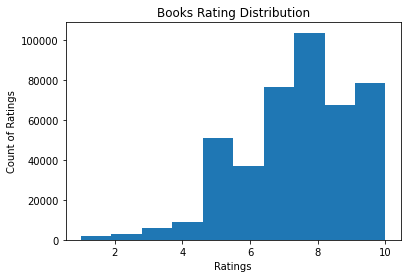

In [129]:
# get user records only with rating >0
df_cleaned_ratings = df_ratings[df_ratings.rating != 0]
plt.hist(df_cleaned_ratings["rating"])
plt.xlabel("Ratings")
plt.ylabel("Count of Ratings")
plt.title("Books Rating Distribution")
plt.show()

In [130]:
# get the number of ratings of every user
df_cleaned_ratings["user"].value_counts()

11676     8524
98391     5802
153662    1969
189835    1906
23902     1395
          ... 
114079       1
114081       1
114096       1
114115       1
276723       1
Name: user, Length: 77805, dtype: int64

In [131]:
#select users which gives more than x ratings
rating_treshold = 100
# mask
valid_users = df_cleaned_ratings["user"].value_counts() > rating_treshold
#create index for DataFrame from valid users
user_index = valid_users[valid_users].index
user_index.shape
# Construct dataset with valid users which gives more than 100 ratings
df_cleaned_ratings = df_cleaned_ratings[df_cleaned_ratings["user"].isin(user_index)] 
df_cleaned_ratings.shape

(116945, 3)

### Merge Ratings and Books data

In [132]:
clean_dataset = df_cleaned_ratings.merge(df_books, on="isbn")
clean_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106001 entries, 0 to 106000
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   user    106001 non-null  int32  
 1   isbn    106001 non-null  object 
 2   rating  106001 non-null  float32
 3   title   106001 non-null  object 
 4   author  106001 non-null  object 
dtypes: float32(1), int32(1), object(3)
memory usage: 4.0+ MB


In [133]:
clean_dataset.describe()

,user,rating
count,106001.000000,106001.000000
mean,126238.268507,7.822105
std,80452.510282,1.817292
min,2033.000000,1.000000
25%,56399.000000,7.000000
50%,114368.000000,8.000000
75%,189835.000000,9.000000
max,278418.000000,10.000000


In [134]:
clean_dataset.head(20)

,user,isbn,rating,title,author
0,277427,002542730X,10.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner
1,11676,002542730X,6.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner
2,12538,002542730X,10.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner
3,52584,002542730X,10.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner
4,110934,002542730X,6.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner
5,113270,002542730X,5.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner
6,128835,002542730X,8.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner
7,150979,002542730X,8.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner
8,164096,002542730X,8.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner
9,173291,002542730X,7.0,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner


In [135]:
#get rating counts for every title from all valid users and reset index
count_rating = clean_dataset.groupby('title')['rating'].count().reset_index()
print(count_rating)

                                                   title  rating
0       A Light in the Storm: The Civil War Diary of ...       1
1                                           Dark Justice       1
2       Earth Prayers From around the World: 365 Pray...       1
3       Final Fantasy Anthology: Official Strategy Gu...       1
4       Good Wives: Image and Reality in the Lives of...       2
...                                                  ...     ...
63145                   why I'm like this : True Stories       1
63146                             Â¡Corre, perro, corre!       1
63147             Â¿Eres tu mi mamÃ¡?/Are You My Mother?       1
63148                  Ã?ngeles fugaces (Falling Angels)       1
63149                             Ã?Â?ber das Fernsehen.       1

[63150 rows x 2 columns]


In [136]:
count_rating.rename(columns={"rating":"rating_counts"}, inplace=True)
count_rating

,title,rating_counts
0,A Light in the Storm: The Civil War Diary of ...,1
1,Dark Justice,1
2,Earth Prayers From around the World: 365 Pray...,1
3,Final Fantasy Anthology: Official Strategy Gu...,1
4,Good Wives: Image and Reality in the Lives of...,2
...,...,...
63145,why I'm like this : True Stories,1
63146,"Â¡Corre, perro, corre!",1
63147,Â¿Eres tu mi mamÃ¡?/Are You My Mother?,1
63148,Ã?ngeles fugaces (Falling Angels),1


In [137]:
# get DataFrame with rating counts for every Book
final_dataset = clean_dataset.merge(count_rating, on="title")
# get books with more than x rating counts
rc_treshold = 100
final_dataset[ final_dataset["rating_counts"] >= rc_treshold]
final_dataset.shape

(106001, 6)

In [138]:
# drop duplicate rating by same user
final_dataset.drop_duplicates(["user","title"], inplace=True)
final_dataset.shape

(105220, 6)

In [164]:
final_dataset.head(38)

,user,isbn,rating,title,author,rating_counts
72,277427,0316776963,8.0,Me Talk Pretty One Day,David Sedaris,35
73,6575,0316776963,8.0,Me Talk Pretty One Day,David Sedaris,35
74,11676,0316776963,8.0,Me Talk Pretty One Day,David Sedaris,35
75,43910,0316776963,7.0,Me Talk Pretty One Day,David Sedaris,35
76,56447,0316776963,7.0,Me Talk Pretty One Day,David Sedaris,35
77,56959,0316776963,10.0,Me Talk Pretty One Day,David Sedaris,35
78,78834,0316776963,10.0,Me Talk Pretty One Day,David Sedaris,35
79,89602,0316776963,8.0,Me Talk Pretty One Day,David Sedaris,35
80,94347,0316776963,6.0,Me Talk Pretty One Day,David Sedaris,35
81,95932,0316776963,8.0,Me Talk Pretty One Day,David Sedaris,35


In [161]:
filter_mask = final_dataset["rating_counts"] > 30
final_dataset = final_dataset[filter_mask]
final_dataset.shape


(2410, 6)

In [203]:
pivot = final_dataset.pivot_table(index="title",columns="user",values="rating")

In [204]:
pivot.fillna(0,inplace=True)
pivot.shape

(63, 416)

In [205]:
from scipy.sparse import csr_matrix
book_sparse = csr_matrix(pivot)

In [206]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm='brute')
model.fit(book_sparse)

NearestNeighbors(algorithm='brute')

In [229]:
distances, suggestions = model.kneighbors(pivot.iloc[0, :].values.reshape(1, -1))

In [230]:
for i in range(len(suggestions)):
  print(pivot.index[suggestions[i]])

Index(['1st to Die: A Novel', '2nd Chance', 'When the Wind Blows',
       'The Brethren', 'House of Sand and Fog'],
      dtype='object', name='title')


In [228]:
pivot.iloc[0,]

user
2033      0.0
2110      0.0
2276      0.0
3757      0.0
4017      0.0
         ... 
274004    0.0
274061    0.0
274301    0.0
275970    0.0
277427    0.0
Name: 1st to Die: A Novel, Length: 416, dtype: float32